# The Sparks Foundation iot and computer vision internship task - Traffic sign classifier
Batch: Feb 2022 


### Author - Venkat Tummala

Importing libraries

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow import keras
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import csv


Data pre-processing

In [2]:
#checking the dataset data
cwd = 'traffic_sign/'
os.listdir(cwd)

['Test', 'Test.csv', 'Meta', 'Train', 'Meta.csv', 'Train.csv']

In [3]:
#constants
train_df = pd.read_csv('traffic_sign/Train.csv')
IMG_WIDTH = 30
IMG_HEIGHT = 30
TRAIN_PATH = 'traffic_sign/train/'
TEST_PATH = 'traffic_sign/test/'
NUM_CATEGORIES = len(os.listdir(TRAIN_PATH))

In [4]:
# Label Overview of the traffic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' 
}

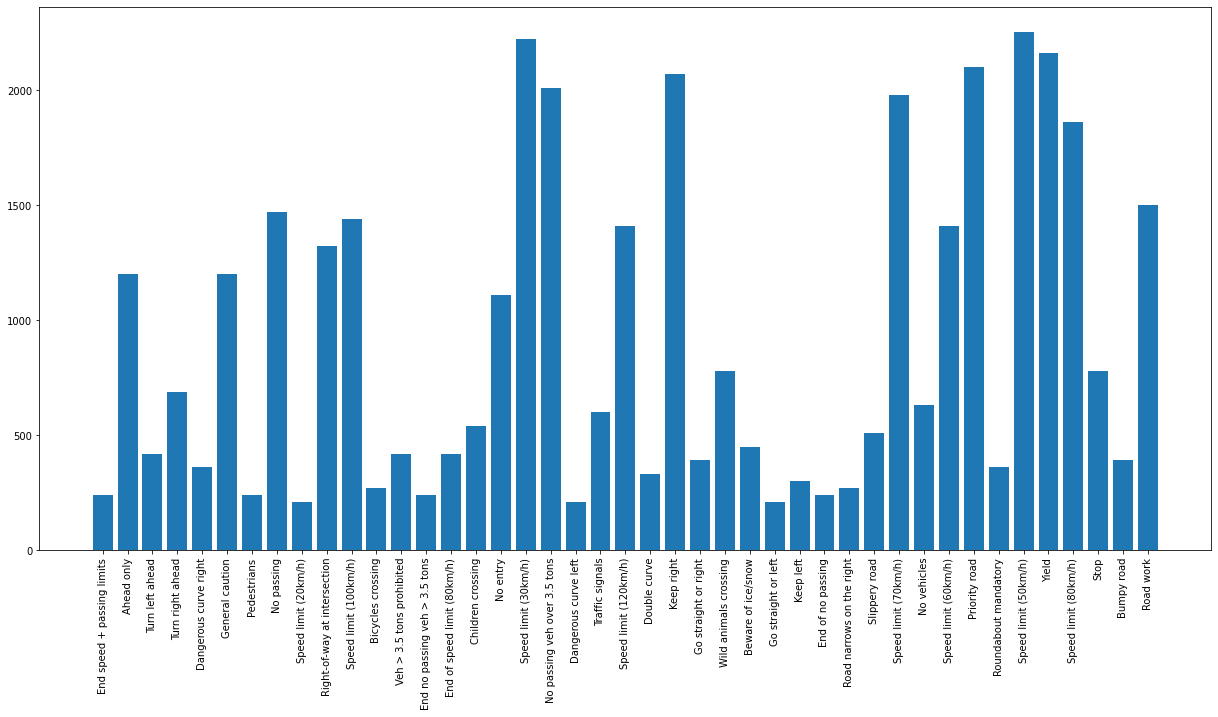

In [5]:
#visualising the data
train_number = []
class_num = []

for folder in os.listdir(TRAIN_PATH):
    train_files = os.listdir(TRAIN_PATH + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()


In [6]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(IMG_WIDTH,IMG_HEIGHT))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [10]:
#loading the data
images, labels = load_data(TRAIN_PATH)
labels = to_categorical(labels)

x_train, x_valid, y_train, y_valid = train_test_split(np.array(images), labels, test_size=0.3)

x_train/=255
x_valid/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_valid',x_valid.shape[0])

input_shape=( IMG_WIDTH,IMG_HEIGHT, 3)

x_train shape: (27446, 30, 30, 3)
Number of images in x_train 27446
Number of images in x_valid 11763


Making a model 

In [11]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))


# Compiling the model


epochs = 30
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

2022-02-08 22:48:09.814055: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

Training the model 

In [12]:
history = model.fit(x_train, y_train,validation_data=(x_valid,y_valid),epochs=20)

Epoch 1/20
858/858 [==============================] - 28s 32ms/step - loss: 2.4098 - accuracy: 0.3049 - val_loss: 1.1356 - val_accuracy: 0.6458
Epoch 2/20
858/858 [==============================] - 26s 30ms/step - loss: 1.1818 - accuracy: 0.6094 - val_loss: 0.5042 - val_accuracy: 0.8817
Epoch 3/20
858/858 [==============================] - 28s 32ms/step - loss: 0.8069 - accuracy: 0.7297 - val_loss: 0.2813 - val_accuracy: 0.9284
Epoch 4/20
858/858 [==============================] - 28s 32ms/step - loss: 0.6249 - accuracy: 0.7924 - val_loss: 0.2050 - val_accuracy: 0.9507
Epoch 5/20
858/858 [==============================] - 26s 30ms/step - loss: 0.5192 - accuracy: 0.8249 - val_loss: 0.1512 - val_accuracy: 0.9639
Epoch 6/20
858/858 [==============================] - 22s 26ms/step - loss: 0.4318 - accuracy: 0.8569 - val_loss: 0.1202 - val_accuracy: 0.9719
Epoch 7/20
858/858 [==============================] - 24s 28ms/step - loss: 0.3641 - accuracy: 0.8798 - val_loss: 0.0932 - val_accuracy:

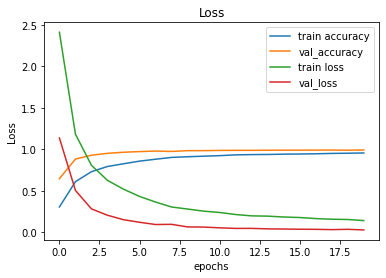

In [18]:
#plotting the training model
plt.figure(0)
plt.plot(history.history['accuracy'], label= 'train accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(0)
plt.plot(history.history['loss'], label= 'train loss')
plt.plot(history.history['val_loss'], label= 'val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()

Evaluation of the model

In [28]:
#loading the data
test_df = pd.read_csv(cwd+'Test.csv')
test_x =[]
for i in test_df.Path:
    img = Image.open(cwd+i)
    img = img.resize((30,30))
    test_x.append(np.array(img))

test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)


In [29]:
#testing the data
x_test = test_x/255
y_test = keras.utils.to_categorical(test_y)

loss, accuracy = model.evaluate(x_test,y_test)
print(f'Loss = {loss:.2f}\naccuracy = {accuracy*100:.2f}%')

395/395 [==============================] - 3s 8ms/step - loss: 0.1551 - accuracy: 0.9659
Loss = 0.16
accuracy = 96.59%


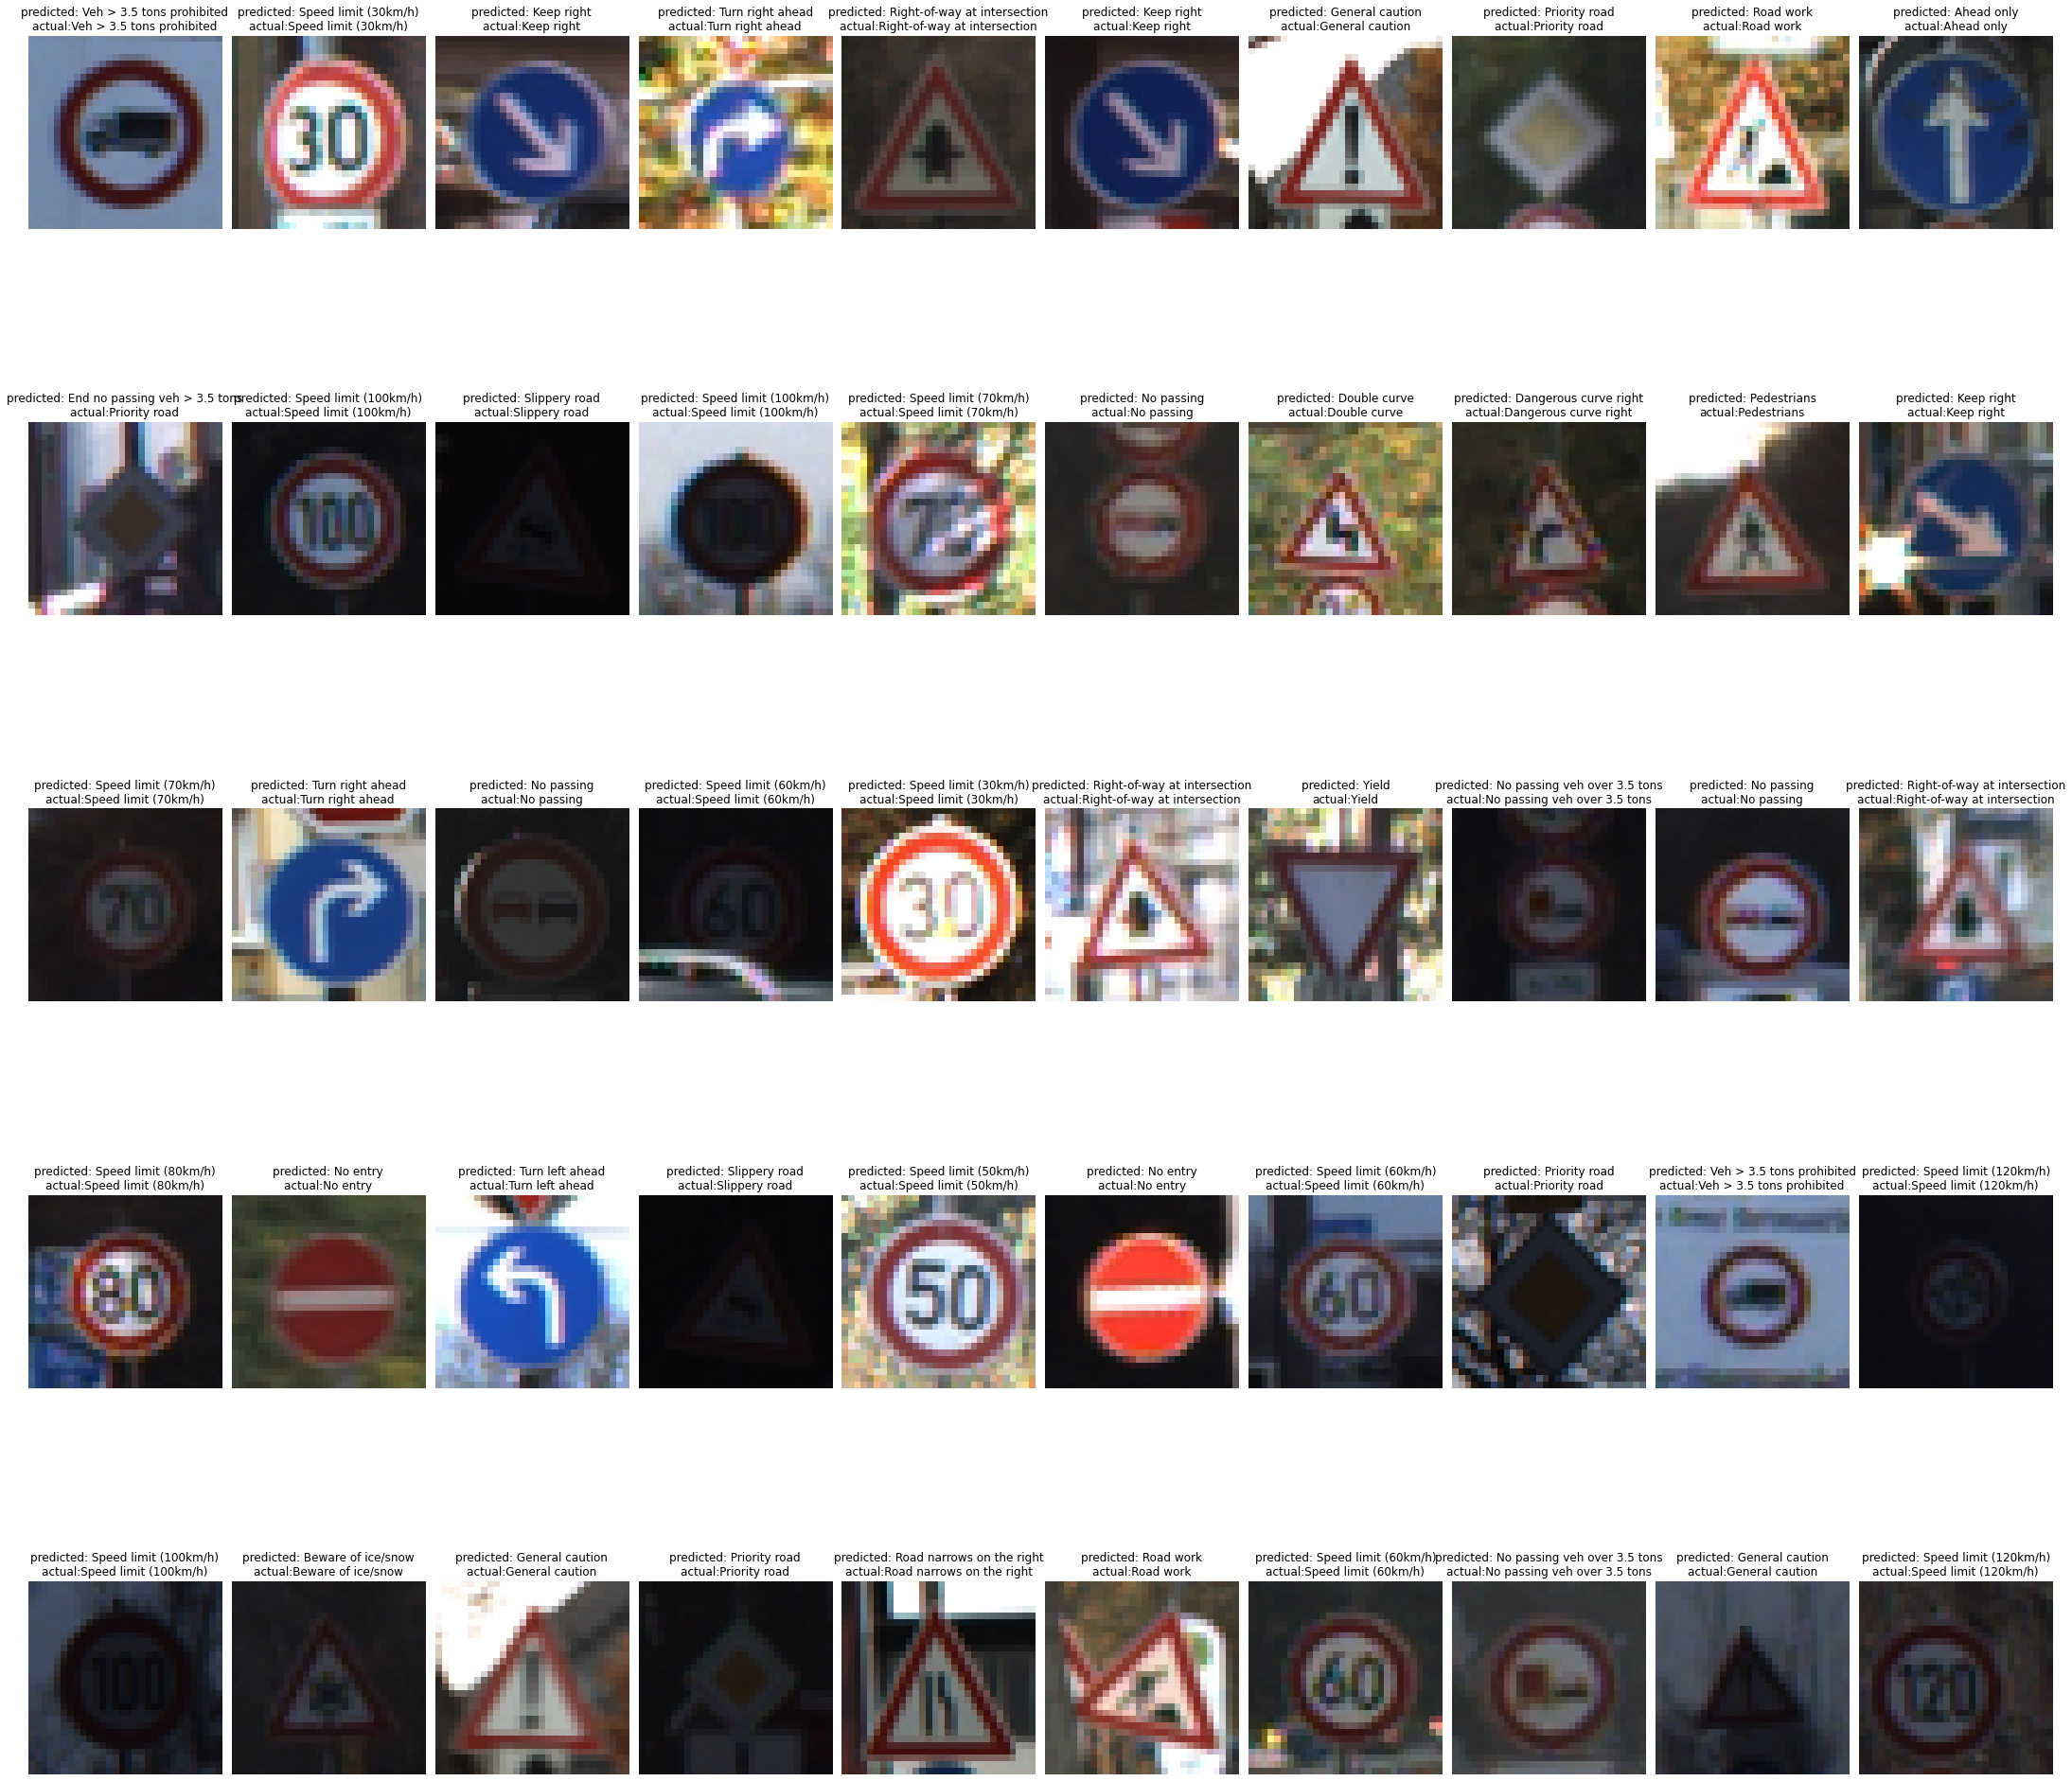

In [30]:
## Making predictions

prob = model.predict(x_test)
pred = np.argmax(prob, axis=-1)

plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10,i+1)
    ax.imshow(x_test[i])
    ax.set_title(f'predicted: {classes[pred[i]]}\nactual:{classes[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()